In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
df = pd.read_csv("netflix_titles.csv")

In [5]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#cleaning the dataset
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration', "show_id"])

In [9]:
df.count()

show_id         7970
type            7970
title           7970
director        5747
cast            7299
country         7970
date_added      7961
release_year    7970
rating          7970
duration        7970
listed_in       7970
description     7970
dtype: int64

In [11]:
type_count = df['type'].value_counts()
type_count

type
Movie      5687
TV Show    2283
Name: count, dtype: int64

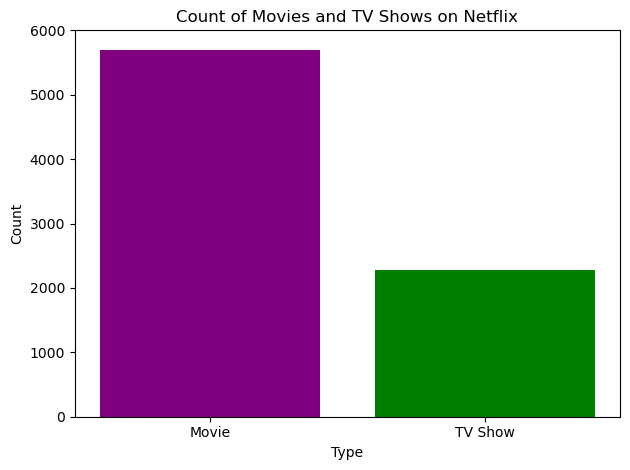

In [17]:
# plotting the bar chart
plt.Figure(figsize=(10, 6))
plt.bar(type_count.index, type_count.values, color=['purple', 'g'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows on Netflix')
plt.ylim(0, 6000)
plt.tight_layout()
plt.savefig('type_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
rating_count = df['rating'].value_counts()
rating_count

rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

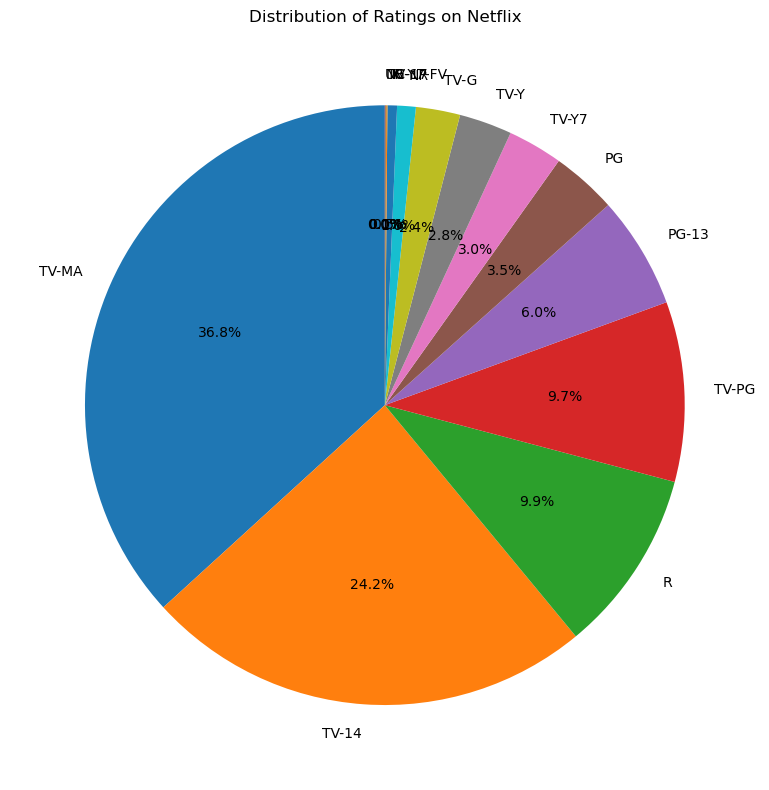

In [25]:
#plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_count, labels=rating_count.index, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of Ratings on Netflix')
plt.tight_layout()
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df["duration_min"] = movie_df["duration"].str.replace(" min", "").astype(int)
movie_df["duration_min"]



0        90
7       125
9       104
12      127
24      166
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration_min, Length: 5687, dtype: int64

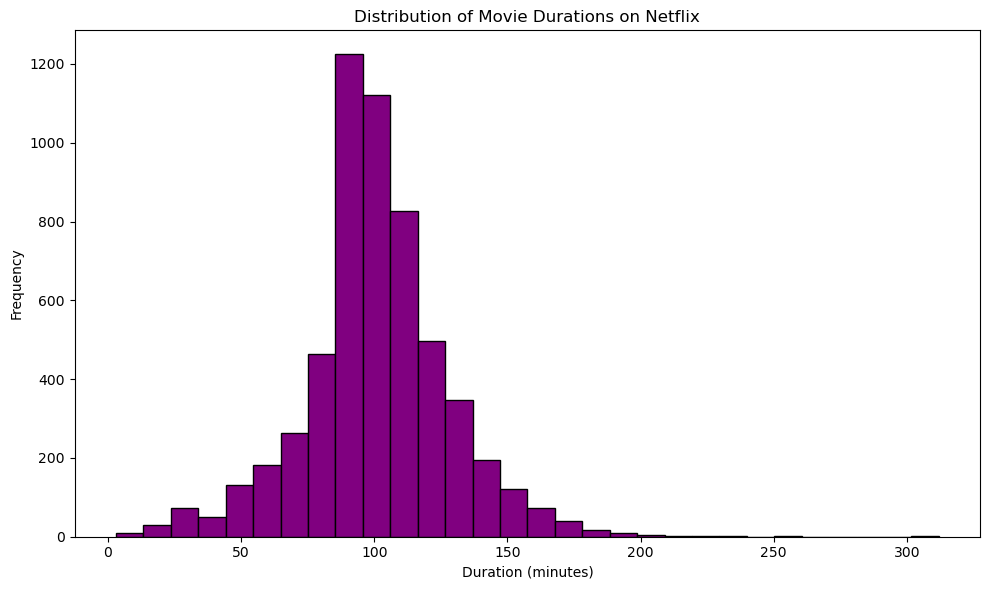

In [38]:
# checking the data distribution using a histogram
plt.figure(figsize=(10, 6))
movie_df = df[df['type'] == 'Movie'].copy()
movie_df["duration_min"] = movie_df["duration"].str.replace(" min", "").astype(int)

plt.hist(movie_df["duration_min"], bins=30, color='purple', edgecolor='black')
plt.xlabel('Duration (minutes)')    
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.tight_layout()
plt.savefig('movie_duration_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [49]:
release_year_count = df['release_year'].value_counts().sort_index()
release_year_count


release_year
1942       2
1943       3
1944       3
1945       4
1946       2
        ... 
2017     965
2018    1038
2019     913
2020     852
2021     383
Name: count, Length: 73, dtype: int64

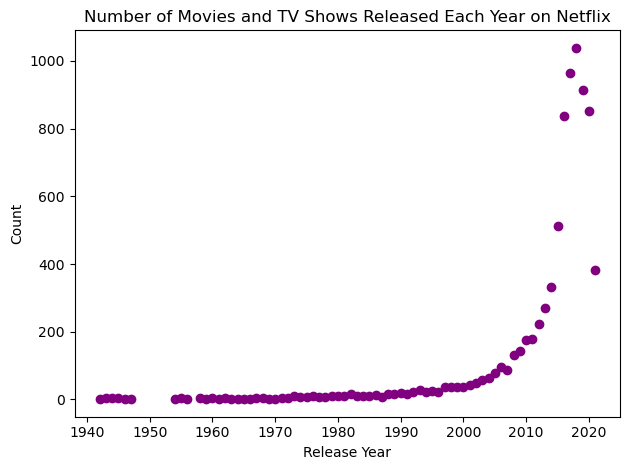

In [48]:
# plotting scatter plot for release year
release_year_count = df['release_year'].value_counts().sort_index()
#release_year_count
plt.Figure(figsize=(12, 6))
plt.scatter(release_year_count.index, release_year_count.values, color='purple')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows Released Each Year on Netflix')
plt.tight_layout()
plt.savefig('release_year_count.png', dpi=300, bbox_inches='tight')
plt.show()

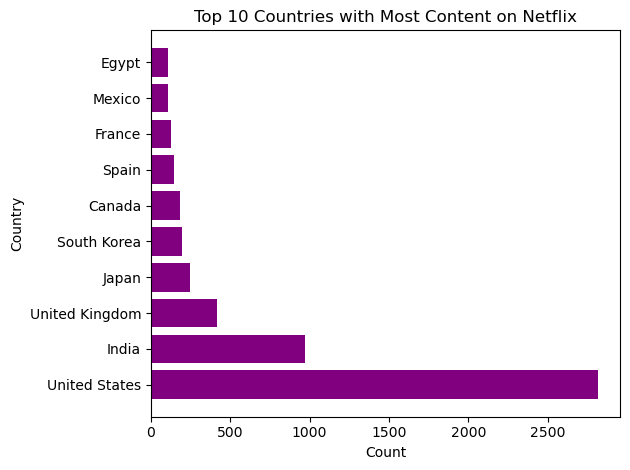

In [53]:
country_count = df['country'].value_counts().head(10)

plt.barh(country_count.index, country_count.values, color='purple')
plt.xlabel('Count')
plt.ylabel('Country')   
plt.title('Top 10 Countries with Most Content on Netflix')
plt.tight_layout()
plt.savefig('top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [55]:
#subplotting the data
content_per_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_per_year

type,Movie,TV Show
release_year,,
1942,2,0
1943,3,0
1944,3,0
1945,3,1
1946,1,1
...,...,...
2017,729,236
2018,713,325
2019,565,348


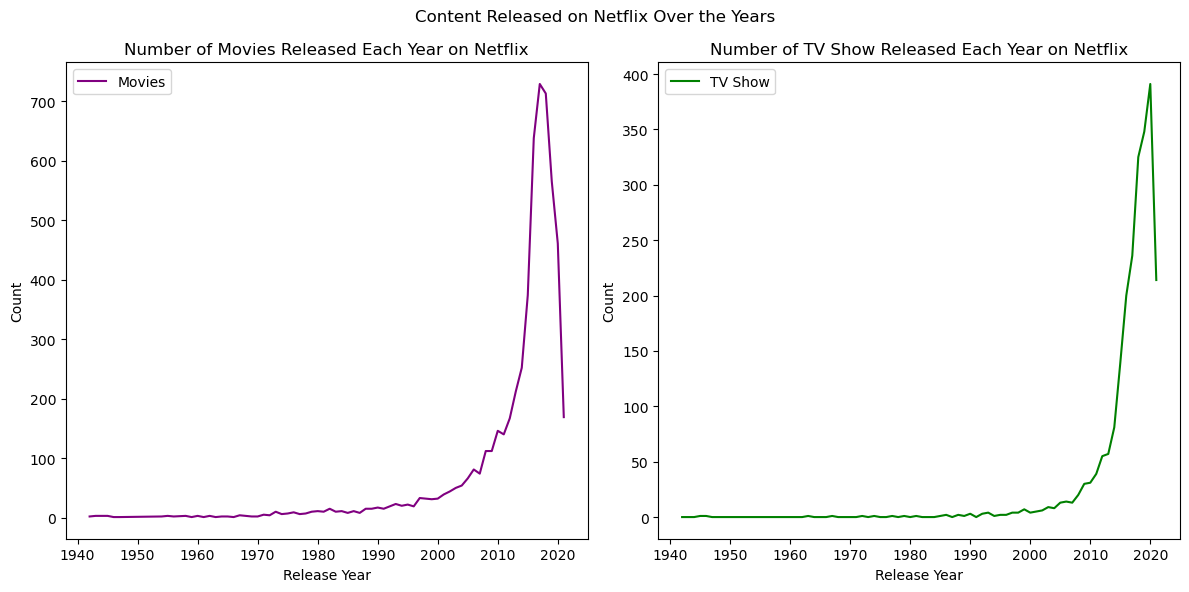

In [66]:
content_per_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)


fig, ax = plt.subplots(1,2, figsize = (12,6) )

ax[0].plot(content_per_year.index, content_per_year['Movie'], label='Movies', color='purple')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of Movies Released Each Year on Netflix')
ax[0].legend()


ax[1].plot(content_per_year.index, content_per_year['TV Show'], label='TV Show', color='g')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Count')
ax[1].set_title('Number of TV Show Released Each Year on Netflix')
plt.suptitle('Content Released on Netflix Over the Years')
ax[1].legend()
plt.savefig('content_per_year.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()




